In [20]:
import pandas as pd
import numpy as np# 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# file_path1  = r"C:\Users\Christopher Aworh\Desktop\data calculate-test.xlsx"
# file_path  = r"C:\Users\Christopher Aworh\Desktop\sw_trunk_main\sw_trunk_main\trunk_main_app\Trunkmain data\HX03.csv"


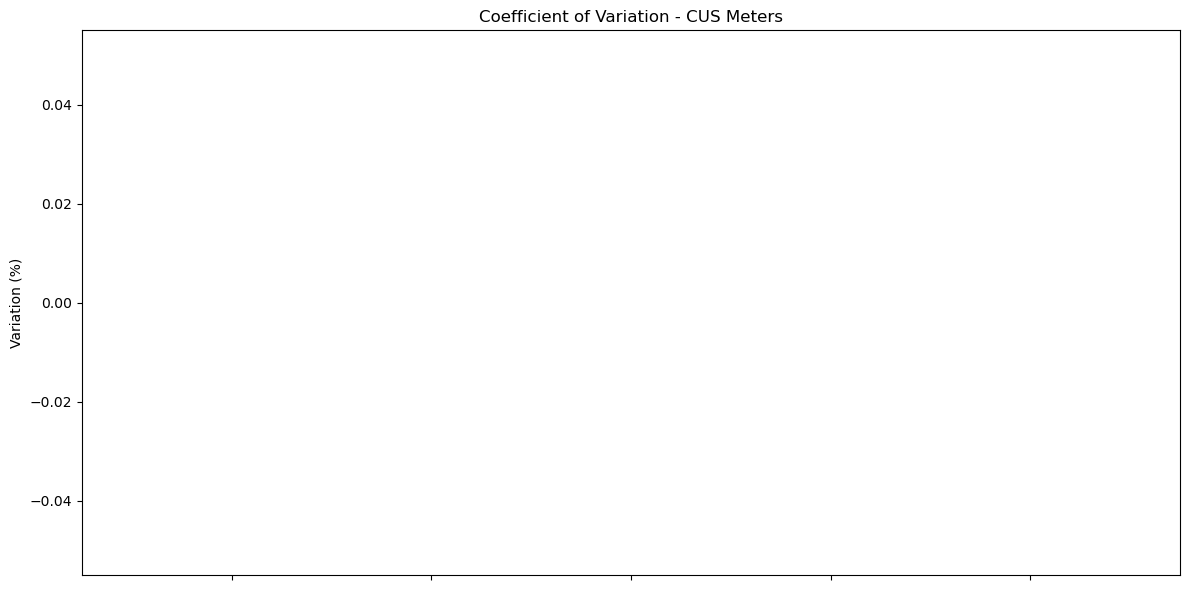

C:\Users\Christopher Aworh\AppData\Local\Temp\ipykernel_22984\48234142.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')


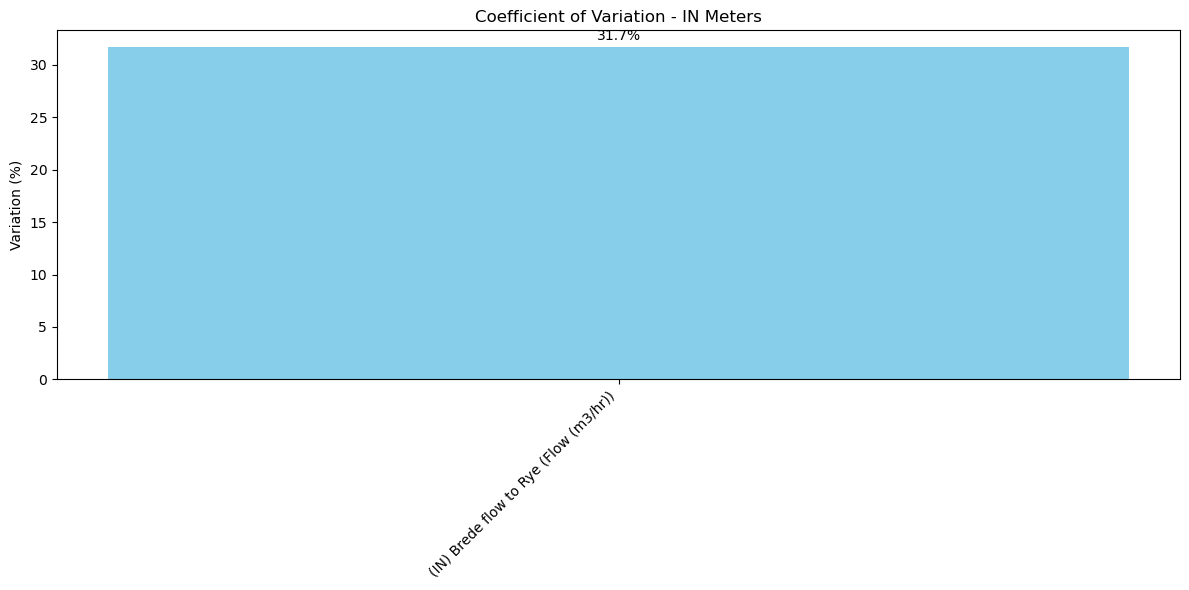

C:\Users\Christopher Aworh\AppData\Local\Temp\ipykernel_22984\48234142.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')


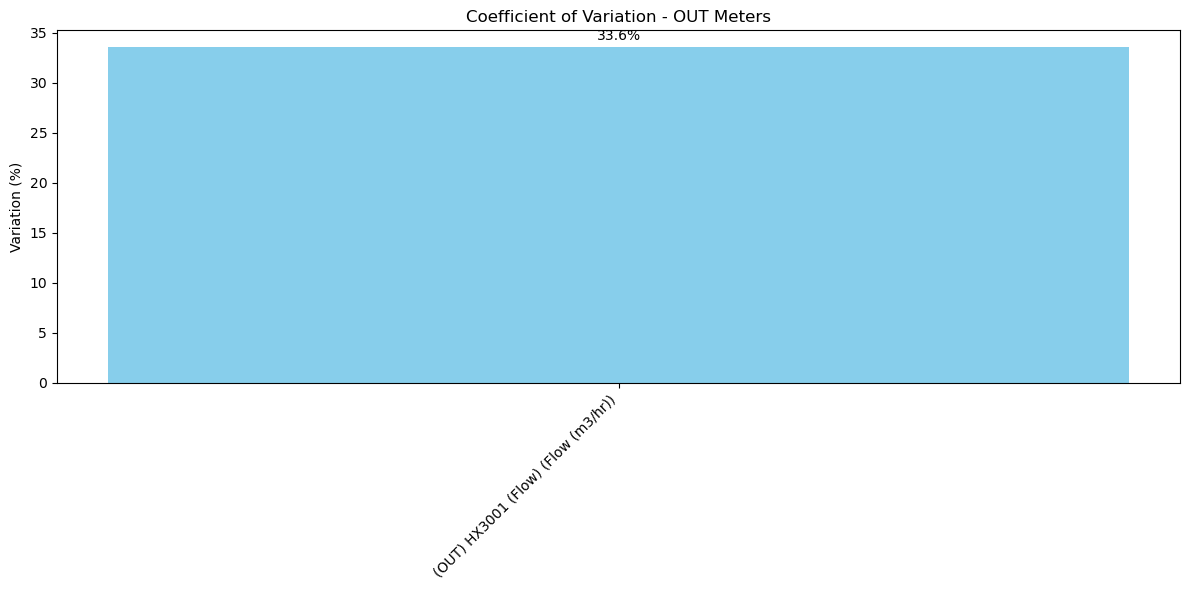

In [25]:



df = pd.read_csv(r"C:\Users\Christopher Aworh\Desktop\sw_trunk_main\sw_trunk_main\trunk_main_app\Trunkmain data\HX03.csv")

# Filter columns with (CUS), (IN), or (OUT)
meter_columns = [col for col in df.columns if any(x in col.upper() for x in ['(CUS)', '(IN)', '(OUT)'])]

# Extract relevant meter columns
meter_df = df[meter_columns].copy()

# Summary statistics
meter_summary_stats = meter_df.describe().T

# Calculate Coefficient of Variation
meter_summary_stats['Coefficient of Variation (%)'] = (
    meter_summary_stats['std'] / meter_summary_stats['mean']
) * 100

# Split into meter type groups
cus_meters = meter_summary_stats.filter(like='(CUS)', axis=0)
in_meters = meter_summary_stats.filter(like='(IN)', axis=0)
out_meters = meter_summary_stats.filter(like='(OUT)', axis=0)

# Plotting function
def plot_variation(data, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(data.index, data['Coefficient of Variation (%)'], color='skyblue')
    ax.set_title(f'Coefficient of Variation - {title}')
    ax.set_ylabel('Variation (%)')
    ax.set_xticklabels(data.index, rotation=45, ha='right')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

# Plot each group
plot_variation(cus_meters, 'CUS Meters')
plot_variation(in_meters, 'IN Meters')
plot_variation(out_meters, 'OUT Meters')


In [26]:
meter_summary_stats

,count,mean,std,min,25%,50%,75%,max,Coefficient of Variation (%)
(IN) Brede flow to Rye (Flow (m3/hr)),175174.0,125.100400,39.668083,-100.0,113.25000,127.125,144.25000,1436.12500,31.708998
(OUT) HX3001 (Flow) (Flow (m3/hr)),178206.0,104.616983,35.130997,0.0,94.79999,107.600,123.19999,180.80003,33.580587


Top 20 Reliable Trunk Mains
   Trunk Main  Average CV (%)
33       HX14       24.042393
29       HX03       32.644792
31       hx09       32.717341
25       FB90       37.732184
57       PX19       38.494144
41       MS99       38.600199
24       DL01       38.771650
64       TX02       40.303534
2        AX10       40.318159
9        BT09       40.383314
46       NX13       40.713050
45       NX12       42.133678
49       PX03       44.995221
52       px06       46.907171
53       px07       47.082077
47       OD14       47.647637
12       CS16       50.010469
4        AX16       51.333013
55       PX12       52.734941
8        BE11       56.266631


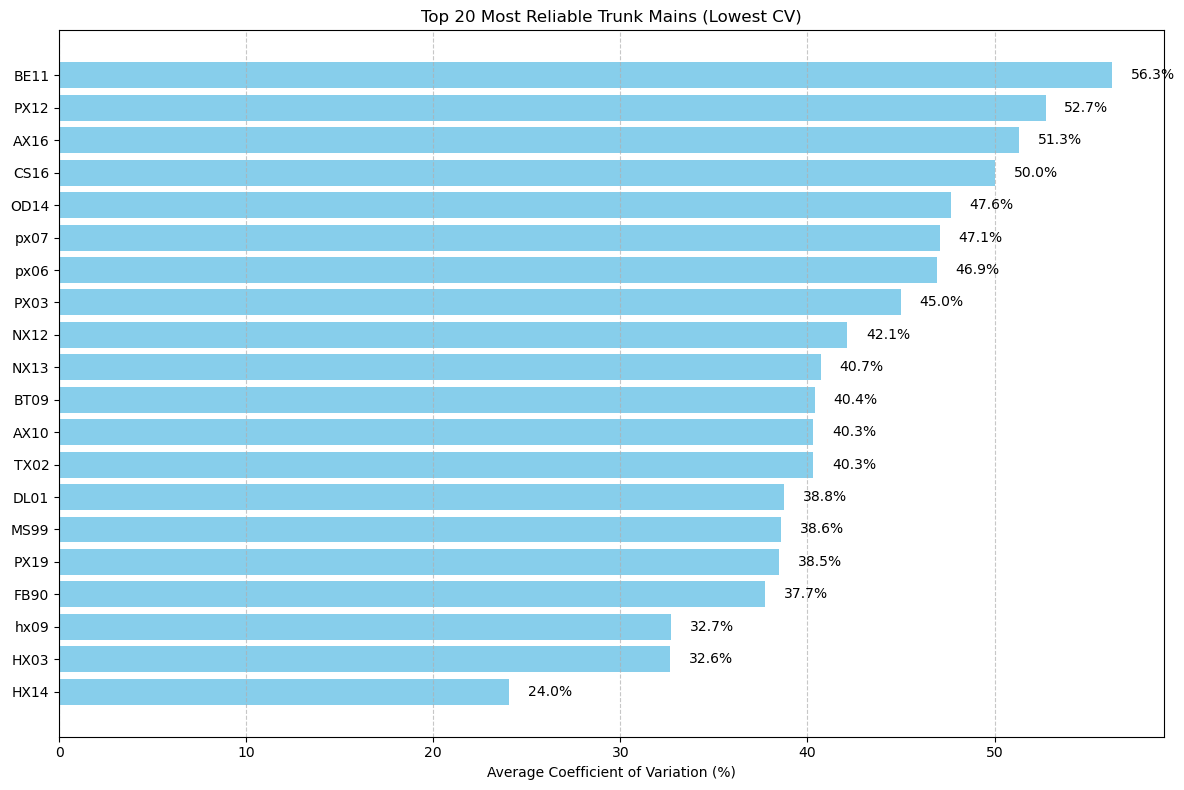

,Trunk Main,Average CV (%)
33,HX14,24.042393
29,HX03,32.644792
31,hx09,32.717341
25,FB90,37.732184
57,PX19,38.494144
41,MS99,38.600199
24,DL01,38.771650
64,TX02,40.303534
2,AX10,40.318159
9,BT09,40.383314


In [27]:
import os
import numpy as np
import pandas as pd

# Local folder path
folder_path = r'C:\Users\Christopher Aworh\Desktop\sw_trunk_main\sw_trunk_main\trunk_main_app\Trunkmain data'

# File list
file_names = os.listdir('Trunkmain data') # full list as you shared

# Results store
trunk_main_reliability = []

for file_name in file_names:
    try:
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        # Filter meter columns
        meter_cols = [col for col in df.columns if any(x in col.upper() for x in ['(CUS)', '(IN)', '(OUT)'])]
        meter_df = df[meter_cols].copy()

        stats = meter_df.describe().T
        stats['Coefficient of Variation (%)'] = np.where(stats['mean'] != 0,
                                                         (stats['std'] / stats['mean']) * 100,
                                                         np.nan)

        avg_cv = stats['Coefficient of Variation (%)'].mean()

        trunk_main_reliability.append({
            'Trunk Main': file_name.replace('.csv', ''),
            'Average CV (%)': avg_cv
        })

    except Exception as e:
        trunk_main_reliability.append({
            'Trunk Main': file_name.replace('.csv', ''),
            'Average CV (%)': np.nan,
            'Error': str(e)
        })

# Convert to DataFrame and sort
reliability_df = pd.DataFrame(trunk_main_reliability)
reliability_df = reliability_df.sort_values(by='Average CV (%)')
top_20_reliable = reliability_df.head(20)

# Save or display
print("Top 20 Reliable Trunk Mains")
print(top_20_reliable)
top_20_reliable.to_csv("top_20_reliable_trunk_mains.csv", index=False)
#########################################################

import matplotlib.pyplot as plt

# Sort the data to display from most to least reliable
top_20_sorted = top_20_reliable.sort_values(by='Average CV (%)')

plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_sorted['Trunk Main'], top_20_sorted['Average CV (%)'], color='skyblue')
plt.xlabel('Average Coefficient of Variation (%)')
plt.title('Top 20 Most Reliable Trunk Mains (Lowest CV)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()

#############################################
styled_df = top_20_reliable.style.background_gradient(cmap='Greens', subset=['Average CV (%)'])
styled_df


In [18]:
stats

,count,mean,std,min,25%,50%,75%,max,Coefficient of Variation (%)
(IN) TX1101 (Flow) (Flow (m3/hr)),108167.0,270.449701,106.973904,54.4,158.40000,296.79998,352.00001,555.59988,39.554085
(IN) TX1103 (Flow) (Flow (m3/hr)),34836.0,32.703985,213.225048,0.0,16.00000,16.00000,24.00000,17507.99880,651.984916
(IN) FL1401 (Flow) 15 min via scada (Flow (m3/hr)),72946.0,331.462247,85.580838,-337.5,253.12500,336.65623,405.42192,822.23424,25.819181
(OUT) FL1001 (Flow) (Flow (m3/hr)),79268.0,9.880488,9.457427,0.0,0.00000,7.40000,18.00000,51.68002,95.718214
(OUT) FL1003 (Flow) (Flow (m3/hr)),107767.0,27.681088,36.512177,0.0,0.00000,6.80000,58.07999,879.99980,131.902970
(OUT) FL2003 (Flow) (Flow (m3/hr)),107136.0,40.643746,17.838098,0.0,22.80000,43.60000,54.00000,104.80000,43.888913
(OUT) FL2005 (Flow) (Flow (m3/hr)),106203.0,12.059243,5.797523,0.0,6.28000,13.16000,16.44000,27.80000,48.075350
(OUT) FL3401 (Flow) (Flow (m3/hr)),108166.0,87.886047,285.127297,0.0,0.00000,0.00000,10.40000,6501.60000,324.428401
(OUT) FL3003 (Flow) (Flow (m3/hr)),73415.0,126.628848,43.154359,16.0,89.20001,136.40000,158.79999,244.80000,34.079406
(OUT) FL4001 (Flow) (Flow (m3/hr)),108167.0,40.600997,16.920074,0.0,24.28000,43.63999,52.67999,92.23999,41.674036


In [19]:
file_names

['AN30.csv',
 'AX01.csv',
 'AX10.csv',
 'AX14.csv',
 'AX16.csv',
 'AX17.csv',
 'BA48.csv',
 'BE10.csv',
 'BE11.csv',
 'BT09.csv',
 'BY06.csv',
 'CS15.csv',
 'CS16.csv',
 'CX01.csv',
 'CX02.csv',
 'CX05.csv',
 'CX10.csv',
 'CX14.csv',
 'CX17.csv',
 'CX20-FULL.csv',
 'CX20.csv',
 'CX52.csv',
 'CX55.csv',
 'DK01.csv',
 'DL01.csv',
 'FB90.csv',
 'HC03.csv',
 'HX01.csv',
 'hx02.csv',
 'HX03.csv',
 'HX05.csv',
 'hx09.csv',
 'HX11.csv',
 'HX14.csv',
 'HX17.csv',
 'HX24.csv',
 'IF18.csv',
 'IX04.csv',
 'IX22.csv',
 'KF20.csv',
 'LR04.csv',
 'MS99.csv',
 'MX16.csv',
 'MX46.csv',
 'MX56.csv',
 'NX12.csv',
 'NX13.csv',
 'OD14.csv',
 'px02.csv',
 'PX03.csv',
 'px04.csv',
 'PX05.csv',
 'px06.csv',
 'px07.csv',
 'px10.csv',
 'PX12.csv',
 'PX17.csv',
 'PX19.csv',
 'px35.csv',
 'PX36.csv',
 'PY03.csv',
 'SD11.csv',
 'TR16.csv',
 'TX01.csv',
 'TX02.csv',
 'TX07.csv',
 'TX08.csv',
 'TX09.csv',
 'tx11.csv']

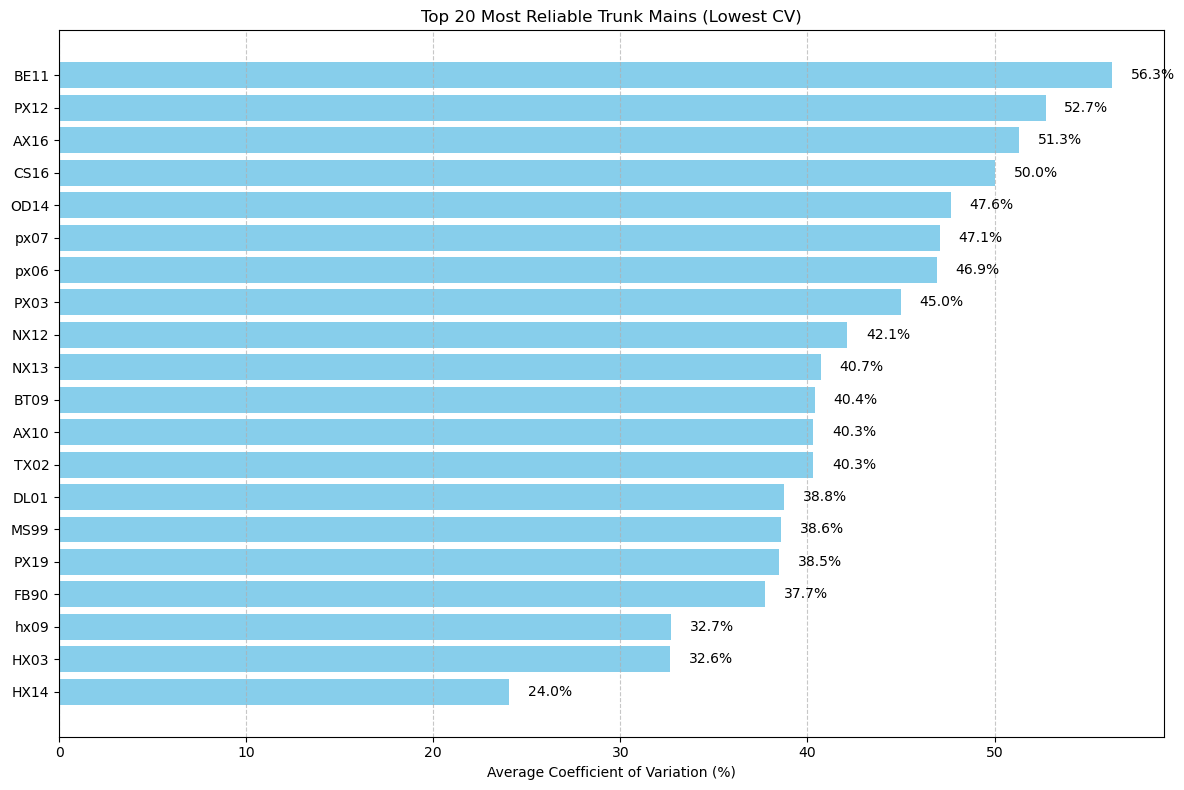

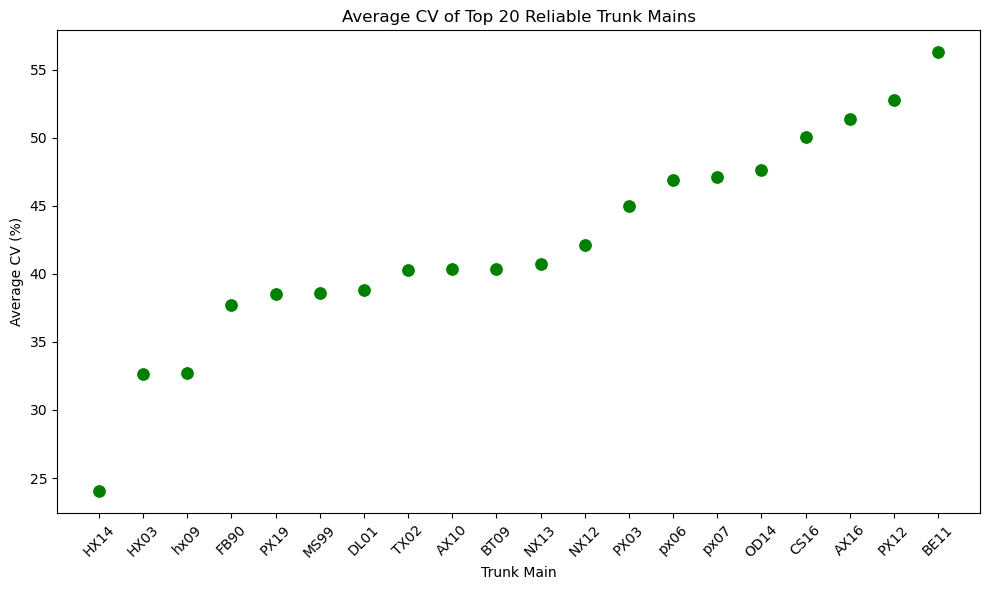

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Trunk Main', y='Average CV (%)', data=top_20_reliable, s=100, color='green')
plt.xticks(rotation=45)
plt.title('Average CV of Top 20 Reliable Trunk Mains')
plt.tight_layout()
plt.show()


In [13]:
styled_df = top_20_reliable.style.background_gradient(cmap='Greens', subset=['Average CV (%)'])
styled_df


,Trunk Main,Average CV (%)
33,HX14,24.042393
29,HX03,32.644792
31,hx09,32.717341
25,FB90,37.732184
57,PX19,38.494144
41,MS99,38.600199
24,DL01,38.771650
64,TX02,40.303534
2,AX10,40.318159
9,BT09,40.383314


In [17]:
trunk_main_reliability

[{'Trunk Main': 'AN30', 'Average CV (%)': 928.9420466870746},
 {'Trunk Main': 'AX01', 'Average CV (%)': 493.6155210667248},
 {'Trunk Main': 'AX10', 'Average CV (%)': 40.318159191072645},
 {'Trunk Main': 'AX14', 'Average CV (%)': 71.7182648260195},
 {'Trunk Main': 'AX16', 'Average CV (%)': 51.33301292613377},
 {'Trunk Main': 'AX17', 'Average CV (%)': 167.03400134531958},
 {'Trunk Main': 'BA48', 'Average CV (%)': 92.75549073409087},
 {'Trunk Main': 'BE10', 'Average CV (%)': 64.88990616453191},
 {'Trunk Main': 'BE11', 'Average CV (%)': 56.266630541280115},
 {'Trunk Main': 'BT09', 'Average CV (%)': 40.38331396106737},
 {'Trunk Main': 'BY06', 'Average CV (%)': 68.27282752898842},
 {'Trunk Main': 'CS15', 'Average CV (%)': 165.221696209728},
 {'Trunk Main': 'CS16', 'Average CV (%)': 50.010469438821175},
 {'Trunk Main': 'CX01', 'Average CV (%)': 105.66469243974214},
 {'Trunk Main': 'CX02', 'Average CV (%)': 91.46284874486895},
 {'Trunk Main': 'CX05', 'Average CV (%)': 107.8189888285195},
 {'Tr